# Lets look at individual feature distributions to determine which ones are or could be made applicable for linear regression


In [1]:
# all libraries required for the entire EDA

from requests import get
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
from seaborn_qqplot import pplot
import pandas as pd

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

%matplotlib inline
sns.set(color_codes=True)

In [2]:
feature = np.array(temp['lifespan'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

NameError: name 'temp' is not defined

In [ ]:
stat, p_val = normaltest(temp['lifespan'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 3.86e-111 



In [ ]:
shapiro(temp['lifespan'])

ShapiroResult(statistic=0.9754143953323364, pvalue=5.513165209910155e-26)

lifespan is normally distributed ✅

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
f,0.004145,814.971434,-56358.071085,0.034861,0.026831,0.005471
lognorm,0.004152,812.927139,-56359.544237,0.034908,0.026899,0.005309
pearson3,0.004172,812.803341,-56339.735274,0.035040,0.027085,0.004891
chi2,0.004237,810.855698,-56276.965618,0.035602,0.034605,0.000110
t,0.004631,812.737834,-55913.521359,0.036590,0.033603,0.000192


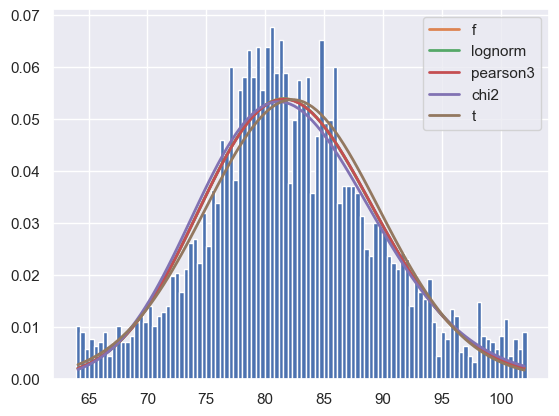

In [ ]:
feature = np.array(temp['genetic'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [ ]:
stat, p_val = normaltest(temp['genetic'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 3.42e-06 



genetic is normally distributed ✅

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pearson3,4.104299,405.350672,-28181.884236,inf,0.043609,3.439501e-07
chi2,4.104301,405.351835,-28181.882326,inf,0.043615,3.424909e-07
f,4.104337,407.355642,-28173.530357,inf,0.043654,3.330950e-07
norm,4.297762,408.110278,-28002.000021,inf,0.082434,1.333447e-24
t,4.297812,410.108053,-27993.637676,inf,0.082453,1.298110e-24


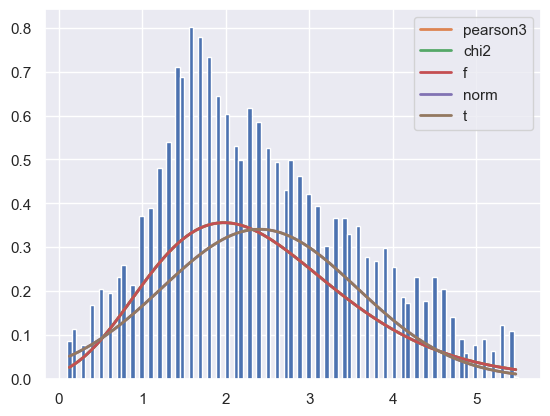

In [ ]:
feature = np.array(temp['exercise'])
f = Fitter(feature, distributions=['norm','t','pearson3','chi2', 'f'],timeout=60)
f.fit()
f.summary()

In [ ]:
stat, p_val = normaltest(temp['exercise'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 7.54e-40 



Visually compared with the p-value we assume normal distribution for exercise ✅

Fitting 8 distributions: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.077226,701.441101,-44415.808348,0.201795,0.159589,2.242438e-91
uniform,0.085468,624.018458,-44009.776442,0.089152,0.109285,5.900316e-43
pearson3,0.089869,690.888342,-43796.267768,0.196524,0.135206,1.318864e-65
lognorm,0.123192,669.047346,-42507.581469,0.182343,0.075310,1.336856e-20
norm,0.124755,663.882886,-42464.373845,0.178747,0.079762,4.653865e-23


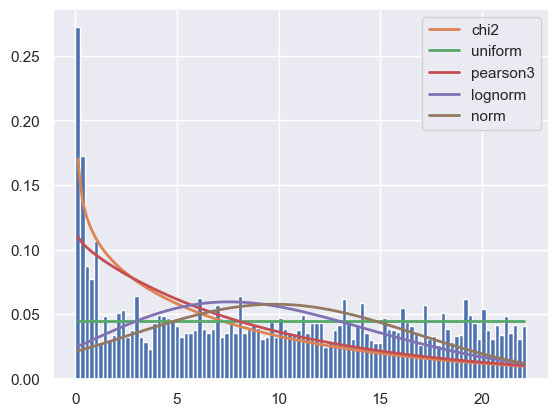

In [ ]:
feature = np.array(temp['smoking'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [ ]:
stat, p_val = normaltest(temp['smoking'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 0.00e+00 



Smoking uniform distributed but with an outliers at 0-2

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.385065,450.046762,-28969.100637,inf,0.114243,6.522429e-47
chi2,3.604262,433.288796,-28712.728390,inf,0.094344,4.202615e-32
norm,4.525048,414.548237,-27791.433293,inf,0.158893,1.402009e-90


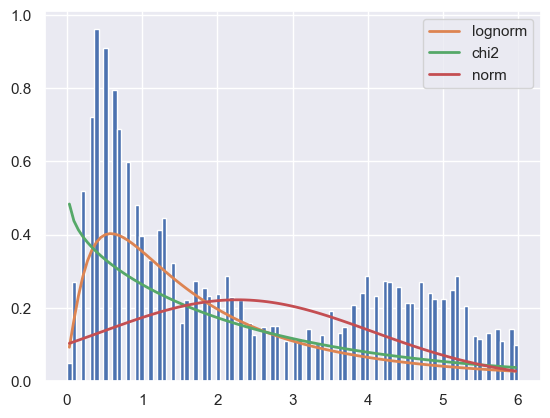

In [ ]:
feature = np.array(temp['alcohol'])
f = Fitter(feature, distributions=['norm','lognorm','chi2'], timeout= 60,)
f.fit()
f.summary()

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.122975,586.825783,-42514.798688,0.080887,0.028993,0.002037
lognorm,0.123500,587.570744,-42497.391299,0.081351,0.028641,0.002405
norm,0.127998,589.887810,-42359.545190,0.086407,0.037222,0.000024


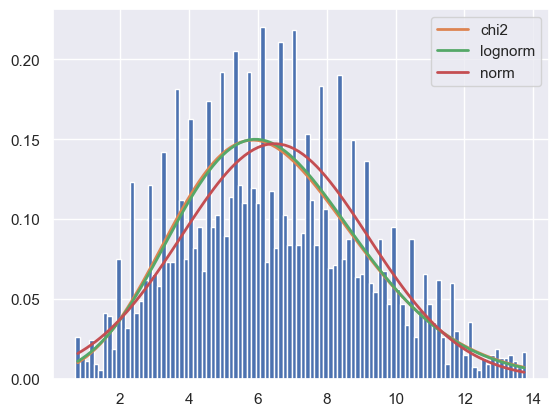

In [ ]:
feature = np.array(temp['sugar'])
f = Fitter(feature, distributions=['norm','lognorm','chi2'], timeout= 60,)
f.fit()
f.summary()

> pip install --upgrade linear-tree

In [ ]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

regr = LinearTreeRegressor(base_estimator=LinearRegression())
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

In [ ]:
p_test = regr.predict(X_test)

<Axes: >

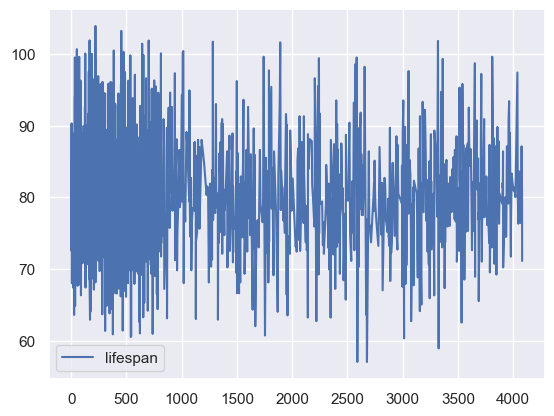

In [ ]:
sns.lineplot(p_test)
sns.lineplot(y_test)